# Climate Analysis

In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd

In [24]:
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [26]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
connection = engine.connect()

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
inspector = inspect(engine)

In [31]:
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [32]:
for table in tables:
    columns = inspector.get_columns(table)
    print(f"Table: {table}")
    for column in columns: 
        print(column["name"], column["type"])
    print("...")

Table: measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
...
Table: station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
...


In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [105]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#find the most recent date recorded
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [107]:
# Calculate the date 1 year ago from the last data point in the database
#find the date one year from the most recent/last data point in database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print(query_date)

2016-08-22


In [123]:
# Perform a query to retrieve the data and precipitation scores
# query to retrieve the last 12 months of precipitation data and plot the results
oneyear = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).\
    filter(Measurement.date > query_date).all()
oneyear

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [124]:
#unpack the date from the results of oneyear
date = [day[0] for day in oneyear[:]]
precip = [day[1] for day in oneyear[:]]

In [125]:
# Save the query results as a Pandas DataFrame and set the index to the date column
oneyear_df = pd.DataFrame(oneyear)
oneyear_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [126]:
#drop NaN values
oneyear_df = oneyear_df.dropna()
oneyear_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2224,2016-08-23,0.15
2225,2016-08-23,0.05
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [127]:
# change column names
# Sort the dataframe by date
# set index to date
oneyear_df = oneyear_df.rename(columns={"date":"Date", "prcp":"Precipitation"})
oneyear_df = oneyear_df.sort_values(by=["Date"])
oneyear_df = oneyear_df.set_index("Date")
oneyear_df

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


In [144]:
oneyear_df

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


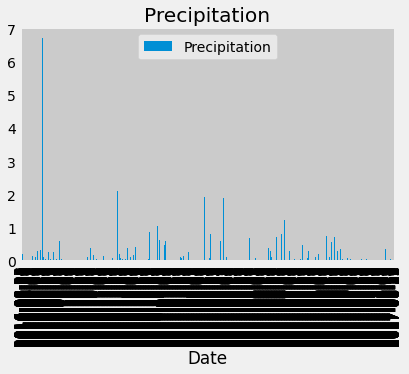

In [168]:
#Use Pandas Plotting with Matplotlib to plot the data
# fix, ax = plt.subplots()
# ax.bar(oneyear_df['Date'], oneyear_df['Precipitation'])
# ax.set_xlabel("Date")
# ax.set_ylabel("Precipitation (Inches)")
# ax.set_title("Precipitation in Inches by Date")
# fig.tight_layout()
# plt.show()
oneyear_df.plot.bar(title="Precipitation")
# plt.tight_layout()
plt.show()

In [172]:
grouped = oneyear_df.groupby(['Date'])
grouped.count().head()

,Precipitation
Date,
2016-08-23,6
2016-08-24,6
2016-08-25,7
2016-08-26,6
2016-08-27,5


In [174]:
grouped2 = grouped['Precipitation'].sum()
grouped2

Date
2016-08-23    2.71
2016-08-24    9.33
2016-08-25    0.54
2016-08-26    0.10
2016-08-27    0.32
              ... 
2017-08-19    0.09
2017-08-20    0.01
2017-08-21    0.58
2017-08-22    0.50
2017-08-23    0.53
Name: Precipitation, Length: 366, dtype: float64

In [176]:
group_df = pd.DataFrame(grouped2)
group_df

,Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


TypeError: xticks() takes from 0 to 2 positional arguments but 9 were given

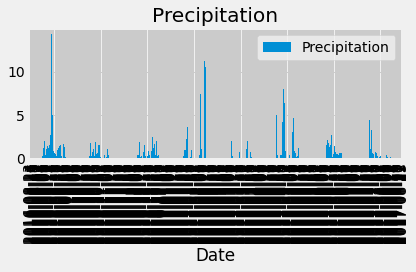

In [179]:
group_df.plot.bar(title="Precipitation")
plt.tight_layout()
plt.xticks("206-08-23", "2016-010-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-08-23")
plt.show()

In [153]:
# Use Pandas to calcualte the summary statistics for the precipitation data
oneyear_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [188]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [183]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most = session.query(Station.id, Station.name, Station.station, func.count(Station.name)).group_by(Station.name).order_by(Station.name.desc()).all()
most

[(6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 1),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 1),
 (7, 'WAIHEE 837.5, HI US', 'USC00519281', 1),
 (5, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 1),
 (4, 'PEARL CITY, HI US', 'USC00517948', 1),
 (9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 1),
 (3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 1),
 (2, 'KANEOHE 838.1, HI US', 'USC00513117', 1),
 (8, 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1)]

In [185]:
Measurements = pd.read_sql("SELECT * FROM measurement", connection)
Measurements

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [186]:
Stations = pd.read_sql("SELECT * FROM station", connection)
Stations

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [255]:
sel = [Station.id, Station.station, Station.name, Measurement.id, Measurement.date, Measurement.tobs]
station_measure3 = session.query(*sel).filter(Station.station == Measurement.station).all()
station_measure3

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 1, '2010-01-01', 65.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 2, '2010-01-02', 63.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 3, '2010-01-03', 74.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 4, '2010-01-04', 76.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 5, '2010-01-06', 73.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 6, '2010-01-07', 70.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 7, '2010-01-08', 64.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 8, '2010-01-09', 68.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 9, '2010-01-10', 73.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 10, '2010-01-11', 64.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 11, '2010-01-12', 61.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 12, '2010-01-14', 66.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 13, '2010-01-15', 65.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 14, '2010-01-16', 68.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US',

In [256]:
sel = [Station.id, Station.station, Station.name, Measurement.id, Measurement.date, Measurement.tobs]
station_measure = session.query(*sel).all()
station_measure

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 1, '2010-01-01', 65.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 2, '2010-01-02', 63.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 3, '2010-01-03', 74.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 4, '2010-01-04', 76.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 5, '2010-01-06', 73.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 6, '2010-01-07', 70.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 7, '2010-01-08', 64.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 8, '2010-01-09', 68.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 9, '2010-01-10', 73.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 10, '2010-01-11', 64.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 11, '2010-01-12', 61.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 12, '2010-01-14', 66.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 13, '2010-01-15', 65.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 14, '2010-01-16', 68.0),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US',

In [257]:
stat_meas3_df = pd.DataFrame(station_measure3)
stat_meas3_df

,id,station,name,id,date,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",1,2010-01-01,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",2,2010-01-02,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",3,2010-01-03,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",4,2010-01-04,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",5,2010-01-06,73.0
...,...,...,...,...,...,...
19545,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19546,2017-08-19,71.0
19546,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19547,2017-08-20,78.0
19547,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19548,2017-08-21,76.0
19548,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19549,2017-08-22,76.0


In [259]:
grouping5 = stat_meas3_df.groupby('station')
grouping5.count().head()

,id,name,id,date,tobs
station,,,,,
USC00511918,1979,1979,1979,1979,1979
USC00513117,2709,2709,2709,2709,2709
USC00514830,2202,2202,2202,2202,2202
USC00516128,2612,2612,2612,2612,2612
USC00517948,1372,1372,1372,1372,1372


In [244]:
stat_meas_df = pd.DataFrame(station_measure)
stat_meas_df

,id,station,name,id,date,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",1,2010-01-01,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",2,2010-01-02,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",3,2010-01-03,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",4,2010-01-04,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",5,2010-01-06,73.0
...,...,...,...,...,...,...
175945,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19546,2017-08-19,71.0
175946,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19547,2017-08-20,78.0
175947,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19548,2017-08-21,76.0
175948,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19549,2017-08-22,76.0


In [242]:
stat_means_df = stat_meas_df.dropna()
stat_means_df

,id,station,name,id,date,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",1,2010-01-01,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",2,2010-01-02,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",3,2010-01-03,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",4,2010-01-04,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",5,2010-01-06,73.0
...,...,...,...,...,...,...
175945,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19546,2017-08-19,71.0
175946,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19547,2017-08-20,78.0
175947,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19548,2017-08-21,76.0
175948,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",19549,2017-08-22,76.0


In [237]:
grouping = stat_means_df.groupby('station')
grouping.count().head()

,id,name,id,date,tobs
station,,,,,
USC00511918,19550,19550,19550,19550,19550
USC00513117,19550,19550,19550,19550,19550
USC00514830,19550,19550,19550,19550,19550
USC00516128,19550,19550,19550,19550,19550
USC00517948,19550,19550,19550,19550,19550


In [246]:
sel = [Station.station, Station.name, Measurement.date, Measurement.tobs]
station_measure2 = session.query(*sel).order_by(Measurement.date.desc()).filter(Measurement.date>query_date).all()
station_measure2

[('USC00519397', 'WAIKIKI 717.2, HI US', '2017-08-23', 81.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', '2017-08-23', 81.0),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', '2017-08-23', 81.0),
 ('USC00517948', 'PEARL CITY, HI US', '2017-08-23', 81.0),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', '2017-08-23', 81.0),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', '2017-08-23', 81.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2017-08-23', 81.0),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', '2017-08-23', 81.0),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', '2017-08-23', 81.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2017-08-23', 82.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', '2017-08-23', 82.0),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', '2017-08-23', 82.0),
 ('USC00517948', 'PEARL CITY, HI US', '2017-08-23', 82.0),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', '2017-08-23', 82.0),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', '

In [248]:
stat2 = pd.DataFrame(station_measure2)
stat2

,station,name,date,tobs
0,USC00519397,"WAIKIKI 717.2, HI US",2017-08-23,81.0
1,USC00513117,"KANEOHE 838.1, HI US",2017-08-23,81.0
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2017-08-23,81.0
3,USC00517948,"PEARL CITY, HI US",2017-08-23,81.0
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",2017-08-23,81.0
...,...,...,...,...
20065,USC00518838,"UPPER WAHIAWA 874.3, HI US",2016-08-23,74.0
20066,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2016-08-23,74.0
20067,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,74.0
20068,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",2016-08-23,74.0


In [253]:
drop = stat2.dropna()
drop

,station,name,date,tobs
0,USC00519397,"WAIKIKI 717.2, HI US",2017-08-23,81.0
1,USC00513117,"KANEOHE 838.1, HI US",2017-08-23,81.0
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2017-08-23,81.0
3,USC00517948,"PEARL CITY, HI US",2017-08-23,81.0
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",2017-08-23,81.0
...,...,...,...,...
20065,USC00518838,"UPPER WAHIAWA 874.3, HI US",2016-08-23,74.0
20066,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2016-08-23,74.0
20067,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,74.0
20068,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",2016-08-23,74.0


In [251]:
group4 = stat2.groupby('station')
group4.count().head(10)

,name,date,tobs
station,,,
USC00511918,2230,2230,2230
USC00513117,2230,2230,2230
USC00514830,2230,2230,2230
USC00516128,2230,2230,2230
USC00517948,2230,2230,2230
USC00518838,2230,2230,2230
USC00519281,2230,2230,2230
USC00519397,2230,2230,2230
USC00519523,2230,2230,2230


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
